data:

- https://fred.stlouisfed.org/series/BOGMBASE
- https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM

In [1]:
import os
import pandas as pd

In [2]:
monetary_file = './data/BOGMBASE.csv'
gold_file = './data/GOLDAMGBD228NLBM.csv'

# 読み込み　月データに整形

## マネタリーベース

In [3]:
monetary_df = pd.read_csv(monetary_file)

In [4]:
monetary_df['monetary'] = monetary_df.BOGMBASE

In [5]:
monetary_df.head()

,DATE,BOGMBASE,monetary
0,1959-01-01,50463.0,50463.0
1,1959-02-01,49805.0,49805.0
2,1959-03-01,49733.0,49733.0
3,1959-04-01,50058.0,50058.0
4,1959-05-01,50112.0,50112.0


In [6]:
monetary_df['date'] = pd.to_datetime(monetary_df.DATE)

In [7]:
monetary_monthly_list = {}
for items in monetary_df.iterrows():
    data = items[1]
    date = data.date
    date_str = '{year}-{month}'.format(year=date.year, month=date.month)
    if date_str in monetary_monthly_list:
        print(date_str)
    else:
        monetary_monthly_list[date_str] = data.monetary

monetary_monthly_list = list(monetary_monthly_list.items())

In [8]:
monetary_monthly_df = pd.DataFrame(monetary_monthly_list, columns=['date', 'monetary'])

In [9]:
pd.to_datetime(monetary_monthly_df.date)

0     1959-01-01
1     1959-02-01
2     1959-03-01
3     1959-04-01
4     1959-05-01
         ...    
733   2020-02-01
734   2020-03-01
735   2020-04-01
736   2020-05-01
737   2020-06-01
Name: date, Length: 738, dtype: datetime64[ns]

In [10]:
monetary_monthly_df

,date,monetary
0,1959-1,50463.0
1,1959-2,49805.0
2,1959-3,49733.0
3,1959-4,50058.0
4,1959-5,50112.0
...,...,...
733,2020-2,3454474.0
734,2020-3,3883155.0
735,2020-4,4844940.0
736,2020-5,5149527.0


## 金価格

In [11]:
gold_df = pd.read_csv(gold_file)
gold_df['gold'] = gold_df.GOLDAMGBD228NLBM

In [12]:
gold_df.head()

,DATE,GOLDAMGBD228NLBM,gold
0,1968-04-01,38.000,38.000
1,1968-04-02,37.600,37.600
2,1968-04-03,37.700,37.700
3,1968-04-04,36.700,36.700
4,1968-04-05,37.200,37.200


In [13]:
gold_df['date'] = pd.to_datetime(gold_df.DATE)

In [14]:
gold_monthly_list = {}
for items in gold_df.iterrows():
    data = items[1]
    date = data.date
    date_str = '{year}-{month}'.format(year=date.year, month=date.month)
    if date_str in gold_monthly_list and gold_monthly_list[date_str]!='.':
        continue
    else:
        gold_monthly_list[date_str] = data.gold

gold_monthly_list = list(gold_monthly_list.items())

In [15]:
gold_monthly_list[:10]

[('1968-4', '38.000'),
 ('1968-5', '39.100'),
 ('1968-6', '41.200'),
 ('1968-7', '40.900'),
 ('1968-8', '38.800'),
 ('1968-9', '39.975'),
 ('1968-10', '39.600'),
 ('1968-11', '38.900'),
 ('1968-12', '39.900'),
 ('1969-1', '41.800')]

In [16]:
gold_monthly_df = pd.DataFrame(gold_monthly_list, columns=['date', 'gold'])

In [17]:
gold_monthly_df.shape, monetary_monthly_df.shape

((628, 2), (738, 2))

In [18]:
join_df = pd.merge(monetary_monthly_df, gold_monthly_df, on='date', how='outer')
join_df.shape

(739, 3)

In [43]:
join_df.gold = join_df.gold.astype(float)

In [19]:
join_df.date = pd.to_datetime(join_df.date)

# 描画

In [32]:
import plotly.express as px
import plotly.graph_objects as go

In [31]:
join_df

,date,monetary,gold
0,1959-01-01,50463.0,NaN
1,1959-02-01,49805.0,NaN
2,1959-03-01,49733.0,NaN
3,1959-04-01,50058.0,NaN
4,1959-05-01,50112.0,NaN
...,...,...,...
734,2020-03-01,3883155.0,1609.70
735,2020-04-01,4844940.0,1594.25
736,2020-05-01,5149527.0,1673.05
737,2020-06-01,5001978.0,1734.80


In [ ]:
go.Scatter()

In [42]:
join_df.gold.astype(float)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
734    1609.70
735    1594.25
736    1673.05
737    1734.80
738    1787.40
Name: gold, Length: 739, dtype: float64

In [46]:
join_df.gold.min()

34.95

In [44]:
join_df.gold.fillna(0).min()

0.0

In [38]:
join_df.monetary.min()

48362.0

In [36]:
join_df.gold.fillna(0)

0            0
1            0
2            0
3            0
4            0
        ...   
734    1609.70
735    1594.25
736    1673.05
737    1734.80
738    1787.40
Name: gold, Length: 739, dtype: object

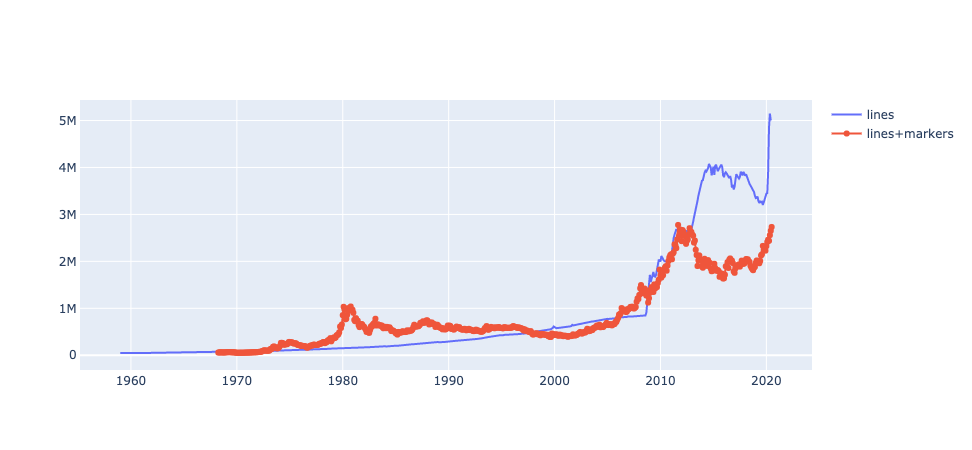

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=join_df.date, y=join_df.monetary,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=join_df.date, y=join_df.gold * join_df.monetary.mean() / join_df.gold.mean(),
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

## 保存

In [31]:
join_df.to_csv('./data/mon_gold_join.csv')

## conbine

In [21]:
combat_list = [list(e)+['monetary'] for e in monetary_monthly_list] + [list(e)+['gold'] for e in gold_monthly_list]

In [22]:
# combat_list

In [23]:
combat_df = pd.DataFrame(combat_list, columns=['date', 'value', 'type'])

In [24]:
combat_df.date = pd.to_datetime(combat_df.date)

In [25]:
combat_df.value = combat_df.value.astype(float)

In [26]:
ratio = combat_df[combat_df.type=='monetary'].value.min() / combat_df[combat_df.type=='gold'].value.min() 

In [27]:
fig = px.line(combat_df, x='date', y='value', color='type', log_y=True)

In [28]:
html_str = fig.write_html('./results/m_g.html')

In [30]:
# fig